# User Engagement Analysis 

In [1]:
import os

os.chdir("..")  # set the working directory one level up
from scripts.db_connection import DbConnection
from scripts.analyzer import Analyzer
from scripts.graph import Graph

db_connection = DbConnection()
analyzer = Analyzer()
graph = Graph()

DB connection engine created successfully.


## loading the data 

In [2]:
engin = db_connection.get_engine()
query = db_connection.select_all_query()
data = analyzer.load_data(query, engin)
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,6.917538e+18,4/25/2019 7:08,86.0,4/26/2019 6:58,586.0,85801.0,2.082008e+14,3.361770e+10,3.588580e+13,G84710B,...,19057468.0,17479332.0,9550174.0,20279964.0,94656701.0,7748729.0,830246354.0,4853723.0,51470484.0,130070145.0
1,7.349883e+18,4/25/2019 7:08,787.0,4/26/2019 10:22,938.0,97990.0,2.082010e+14,3.366035e+10,3.552121e+13,L50549B,...,21390002.0,17986604.0,3762432.0,12431639.0,262131516.0,16060458.0,231010960.0,6647951.0,55540207.0,302809170.0
2,7.349883e+18,4/25/2019 7:08,999.0,4/26/2019 6:53,952.0,85499.0,2.082019e+14,3.366181e+10,8.635410e+13,D74533B,...,12582165.0,19171616.0,618943.0,12746092.0,224195433.0,14322502.0,606851920.0,9907541.0,60047294.0,254137865.0
3,1.311448e+19,4/25/2019 7:08,621.0,4/26/2019 5:36,416.0,80834.0,2.082018e+14,3.361067e+10,3.566761e+13,D74665B,...,19364472.0,13430423.0,19731391.0,20728976.0,583073689.0,15471090.0,516812820.0,5279335.0,55421360.0,634846644.0
4,7.349883e+18,4/25/2019 7:08,980.0,4/26/2019 12:51,259.0,106933.0,2.082014e+14,3.366263e+10,3.573621e+13,D40268C,...,14496912.0,16902241.0,19219574.0,6127184.0,138802107.0,6162802.0,255742233.0,10728515.0,44523995.0,183440474.0


## Data cleaning 

In [3]:
cleaned_data = analyzer.handle_missing_values(data)
cleaned_data = analyzer.handle_outliers(cleaned_data)

 ## Top 10 customers per engagement metric 

In [4]:
query = db_connection.select_aggregate_query('"MSISDN/Number"', "Customer_ID", "Count")
engagement_metrics = analyzer.load_data(query, engin)
engagement_metrics

,customer_id,count
0,3.362632e+10,18
1,3.362578e+10,17
2,3.361489e+10,17
3,3.365973e+10,16
4,3.367588e+10,15
...,...,...
106851,3.365818e+10,1
106852,3.376179e+10,1
106853,3.378175e+10,1
106854,3.366889e+10,1


## Classifying  customers in three groups of engagement. 

In [5]:
engagement_cluster = analyzer.cluster(engagement_metrics, "count", 3)
engagement_cluster.iloc[3250:3255]

,customer_id,count,normalized_count,engagement_cluster
3250,3.369969e+10,4,0.176471,2
3251,3.376156e+10,3,0.117647,1
3252,3.364152e+10,3,0.117647,1
3253,3.367030e+10,3,0.117647,1
3254,3.376186e+10,3,0.117647,1


## Engagement cluster statistics  

In [6]:
cluster_stats = (
    engagement_cluster.groupby("engagement_cluster")["count"]
    .agg(["min", "max", "mean", "sum", "count"])
    .reset_index()
)

# Rename columns for clarity
cluster_stats.columns = [
    "Cluster",
    "Min Engagement",
    "Max Engagement",
    "Average Engagement",
    "Total Engagement",
    "Number of Customer",
]
cluster_stats

,Cluster,Min Engagement,Max Engagement,Average Engagement,Total Engagement,Number of Customer
0,0,1,1,1.000000,77731,77731
1,1,2,3,2.170905,56170,25874
2,2,4,18,4.624423,15034,3251


## visualize  Engagement cluster statistics  

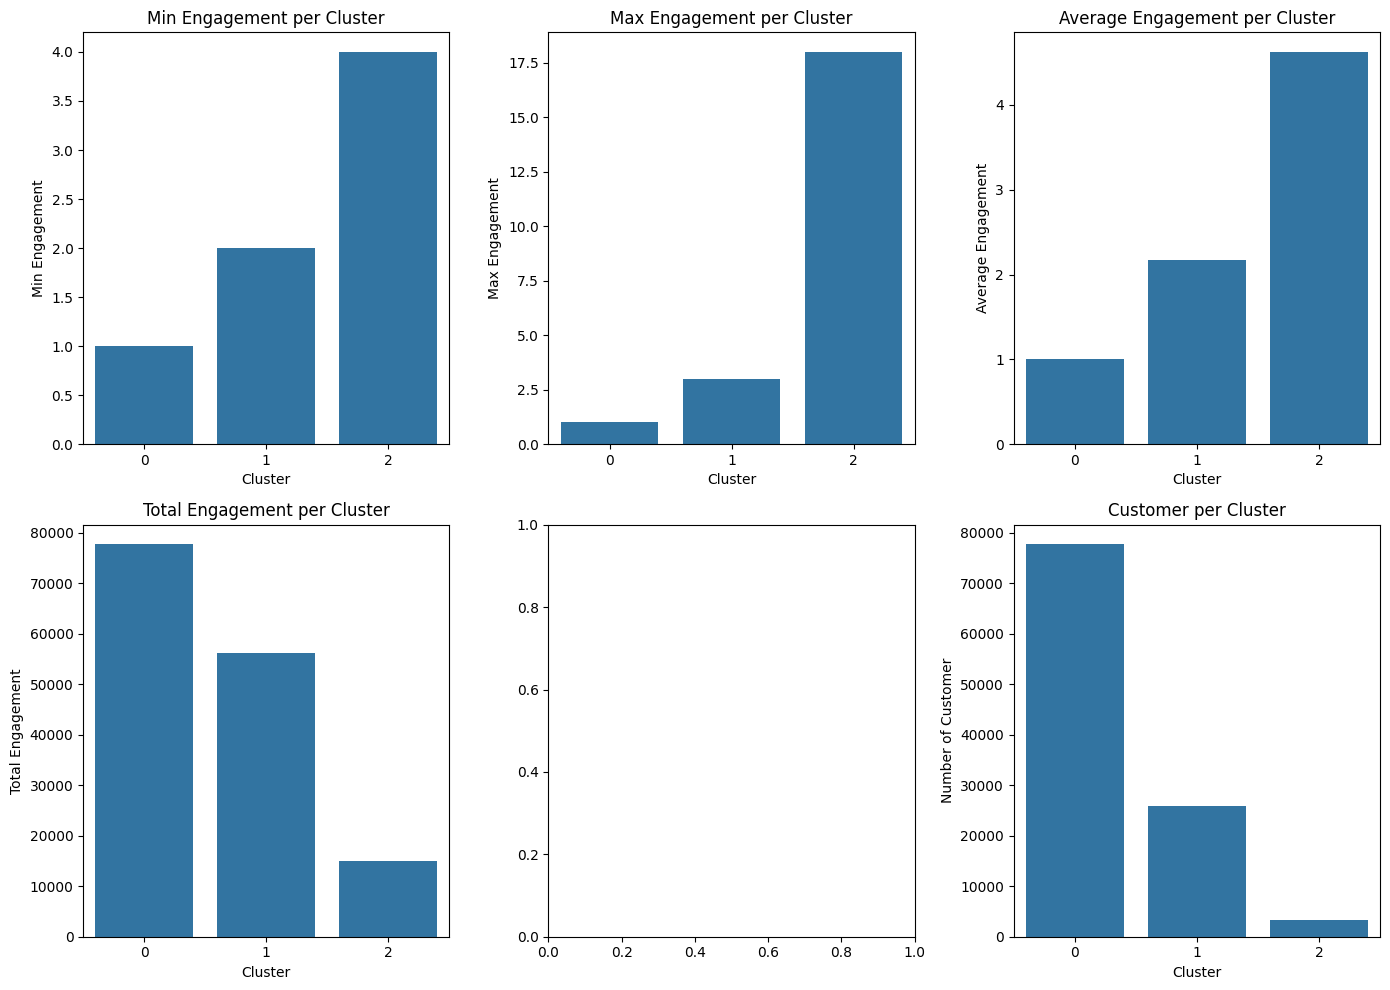

In [7]:
graph.plot_engagement_cluster(cluster_stats)

# user total traffic per application 

In [8]:
user_traffic = analyzer.user_traffic_per_apk(cleaned_data)

top_10_Google = user_traffic.nlargest(10, "Total Google Data")
top_10_Email = user_traffic.nlargest(10, "Total Email Data")
top_10_YouTube = user_traffic.nlargest(10, "Total YouTube Data")
top_10_Netflix = user_traffic.nlargest(10, "Total Netflix Data")
top_10_Gaming = user_traffic.nlargest(10, "Total Gaming Data")
top_10_Other = user_traffic.nlargest(10, "Total Other Data")
top_10_YouTube

,MSISDN/Number,Total Google Data,Total Email Data,Total YouTube Data,Total Netflix Data,Total Gaming Data,Total Other Data
13052,3.362578e+10,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
92013,3.376054e+10,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09
6373,3.361489e+10,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09
13395,3.362632e+10,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09
75613,3.367588e+10,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09
13860,3.362708e+10,87125921.0,23567219.0,308790774.0,267040897.0,4.972353e+09,5.117791e+09
91669,3.376041e+10,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09
85601,3.369879e+10,79736125.0,29059042.0,302661958.0,268247480.0,5.753743e+09,4.689876e+09
665,3.360313e+10,86929016.0,26198895.0,284090139.0,260488421.0,4.191445e+09,6.326671e+09
15507,3.363004e+10,76717543.0,26898243.0,275462004.0,233378572.0,4.794630e+09,4.978853e+09


# Plot the Top 3 Most Used Applications per user traffic


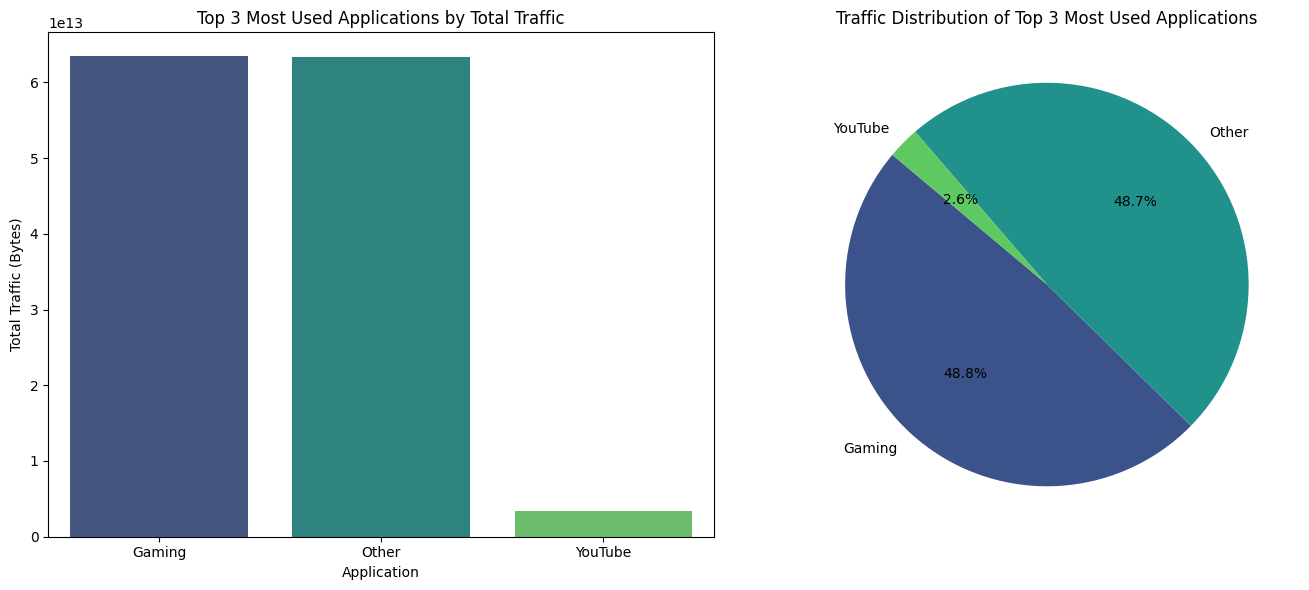

In [9]:
graph.plot_most_used_apk(user_traffic)